In [1]:
%cd ../fiberphotopy/
import importlib
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import pprint
import scipy
import time


import fp_utils
import behavioral_data
import fiber_data
import analysis

def rel():
    importlib.reload(behavioral_data)
    importlib.reload(fiber_data)
    importlib.reload(analysis)
    importlib.reload(fp_utils)
rel()

dataf = '../../DATA/FIGURES/'

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


# Behavioral summary

In [2]:
gb11 = behavioral_data.BehavioralData('../../DATA/j36/bsa22032022c20_01.dat')

Importing ../../DATA/j36/bsa22032022c20_01.dat...
Importing of ../../DATA/j36/bsa22032022c20_01.dat finished in 0.242 seconds


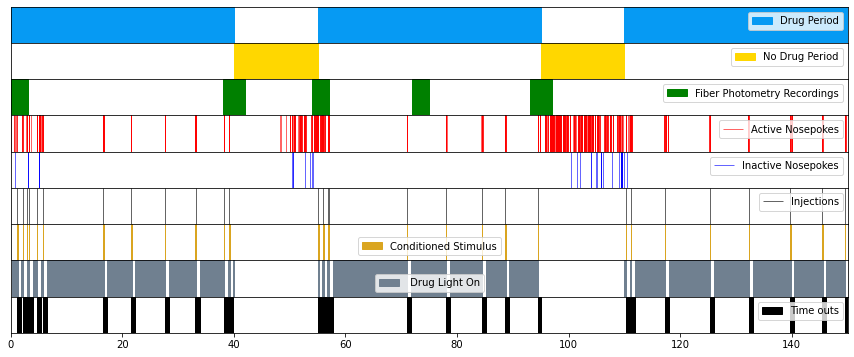

In [3]:
gb11.summary(figsize=(15,6))
plt.savefig(dataf+'summary2.svg',dpi=1200)

# Data selection

In [4]:
gb11.__dict__.keys()

dict_keys(['hello', 'configfile', 'config', 'rat_ID', 'file_unit', 'user_unit', 'experiment_duration', 'fixed_ratio', 'close_interval', 'elements', 'df', 'custom', 'filepath', 'start', 'end', 'time_ratio', 'hled_on', 'hled_off', 'led1_on', 'led1_off', 'led2_on', 'led2_off', 'np1', 'np2', 'inj1', 'ttl1_on', 'ttl1_off', 'rec_start', 'HLED_ON', 'HLED_OFF', 'LED1_ON', 'LED1_OFF', 'LED2_ON', 'LED2_OFF', 'TTL1_ON', 'TTL1_OFF', 'DARK', 'TO_DARK', 'TIMEOUT', 'NOTO_DARK', 'switch_d_nd', 'switch_to_nd', 'switch_nd_d', 'switch_dto_nd', 'switch_1', 'np1_1', 'np1_2', 'np1_3', 'np1_4', 'np1_5', 'D_1', 'D_2', 'D_3', 'ND_1', 'ND_2', 'x', 'y', 'xytime'])

[7.375000e+00 3.585700e+01 4.072300e+01 4.167700e+01 5.551800e+01
 6.967700e+01 7.008200e+01 1.203000e+02 1.232420e+02 1.237040e+02
 1.286390e+02 1.290290e+02 1.608120e+02 1.738500e+02 1.742300e+02
 1.746470e+02 1.752530e+02 1.757340e+02 1.789960e+02 1.792280e+02
 1.795280e+02 1.799110e+02 1.923150e+02 1.927030e+02 1.929940e+02
 1.934070e+02 1.938700e+02 1.949860e+02 2.226420e+02 2.811520e+02
 2.816890e+02 2.820520e+02 2.824500e+02 2.829080e+02 2.833700e+02
 2.838480e+02 2.843250e+02 2.847530e+02 3.012790e+02 3.017570e+02
 3.021370e+02 3.025540e+02 3.032480e+02 3.036950e+02 3.041920e+02
 3.046600e+02 3.051220e+02 3.170550e+02 3.174620e+02 3.184650e+02
 3.188990e+02 3.192740e+02 3.196660e+02 3.201480e+02 3.206740e+02
 3.402760e+02 3.412160e+02 3.415850e+02 3.419440e+02 3.424210e+02
 3.431300e+02 3.435180e+02 9.936850e+02 9.939800e+02 9.944870e+02
 9.948800e+02 9.952200e+02 9.957120e+02 9.960420e+02 9.963810e+02
 9.967860e+02 9.976360e+02 9.982560e+02 9.986740e+02 9.990230e+02
 9.993720e

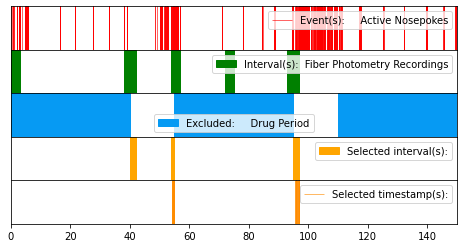

In [5]:
gb11.export_timestamps(events='np1',interval='TTL1_ON',exclude='HLED_OFF',to_csv=False,figsize=(8,4))
plt.ylabel('Time (min)')
plt.legend()
plt.savefig(dataf+'selection2.svg',dpi=1200)

# Perievent plotting

In [6]:
AS21Rsessions = analysis.MultiSession("../../DATA/AS21R",debug=800)
switch_DND = AS21Rsessions.analyze(['switch_d_nd','switch_to_nd'])

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: '../../DATA/AS21R'

In [ ]:
switch_DND.plot('zscores',alpha=0.5,smooth_mean=True,smooth_data=True,figsize=(12,6))
plt.title(f'Switch from drug to no drug ({len(AS21Rsessions.names)} sessions)')
plt.grid(b='True',which='both')
plt.ylabel('Standard scores (preevent mean)')
plt.xlabel('Epoch centered around event time')
plt.legend()
plt.savefig(dataf+'zswitchDND2.svg',dpi=1200)

In [ ]:
switch_DND.plot('signal',figsize=(12,6))
plt.ylabel('dF/F')
plt.xlabel('Epoch centered around event time')
plt.legend()
plt.savefig(dataf+'fswitchDND2.svg',dpi=1200)

# Basic signal stuff

In [ ]:
s11 = fiber_data.FiberData('../../DATA/AS21R/rat_11_SA_6/AS21RSA6Rat1122032022_0.csv')

In [ ]:
data = s11.norm(rec=1,add_time=True,method='raw')
ti = data[:,0]
si = data[:,1]
co = data[:,2]
no = s11.norm(rec=1,add_time=False)

a = int(np.where(no == no.min())[0][0] - 50)
b = int(np.where(no == no.min())[0][-1] + 50)

time       = np.concatenate((ti[:a],ti[b+1:]))
signal     = np.concatenate((si[:a],si[b+1:]))
control    = np.concatenate((co[:a],co[b+1:]))
normalized = np.concatenate((no[:a],no[b+1:]))

fig,ax = plt.subplots(3,figsize=(10,5))
ax[0].plot(time,signal,label='calcium dependant')
ax[0].tick_params('x', labelbottom=False)
ax[1].plot(time,control,c='r',label='isosbestic')
ax[2].plot(time,normalized,c='g',label='dF/F')
plt.subplots_adjust(hspace=0)
for n in range(3):
    ax[n].grid(b='True',which='both')
    ax[n].legend()
plt.savefig(dataf+'signal_control_norm2.svg',dpi=1200)

# Peak analysis

In [ ]:
rel()

In [ ]:
s11.detect_peaks(s11.norm(1)[:,0],s11.norm(1)[:,1],figsize=(12,5))
plt.grid(b='True',which='both')
plt.ylim([-3, 4])
plt.ylabel('Signal standard scores')
plt.xlabel('Time (s)')
plt.title('Peak detection')
plt.savefig(dataf+'peakdetection2.svg',dpi=1200)

In [ ]:
s11.plot_transients(rec=1,figsize=(12,5))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Standard score)')
plt.title('Calcium transients')
plt.savefig(dataf+'transients2.svg',dpi=1200)

# Event plotting